# Heart Disease Prediction: Data Science Group Assignment

**Team Members:** falaq Alwardy
**Course:** Data Science
## 1. Overview
We are analyzing the Heart Disease dataset to build a predictive model using a Voting Classifier ensemble.

## 2. Methodology
We will follow these required phases:
1.  **Getting Data:** Loading and cleaning the dataset.
2.  **Visualize Data:** Exploring distributions and correlations.
3.  **Statistical Analysis:** Understanding relationships between features.
4.  **Modeling:** Building a Voting Classifier (Logistic Regression + Random Forest + Gradient Boosting).

### Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub

# Suppress warnings to keep output clean 
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")

## Phase 1: Getting Data
In this phase, we load the dataset and perform initial cleaning.

**Step 1.1: Load the Dataset**

In [11]:
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


In [12]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


**Step 1.2: Inspect the Data Structure (Head & Tail)**
Checking the first few and last few rows to understand the data format.

In [13]:
# Display first 5 rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
# Display last 5 rows
print("Last 5 rows:")
display(df.tail())

Last 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**Step 1.3: Data Summary & Information**
Using `info()` to check data types and `describe()` for a statistical summary.

In [15]:
# Check data types and non-null counts
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
# Statistical Summary of the dataset
print("Data Statistical Summary:")
display(df.describe())

Data Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Step 1.4: Check for Missing Values**

In [17]:
# Check for null values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Step 1.5: Remove Duplicates**

In [18]:
# Check for and drop duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Dropping {duplicates} duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"New Shape: {df.shape}")
else:
    print("No duplicates found.")

Dropping 723 duplicate rows...
New Shape: (302, 14)


## Phase 2: Visualize Data
We visualize the data to understand the distribution of the target variable and key features.

**Step 2.1: Target Distribution (Class Balance)**

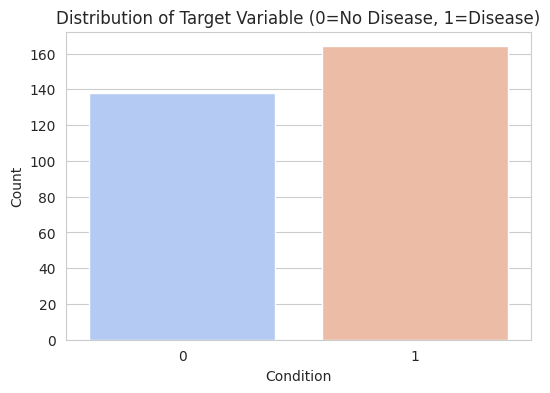

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (0=No Disease, 1=Disease)')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

**Step 2.2: Age Distribution by Heart Disease Status**

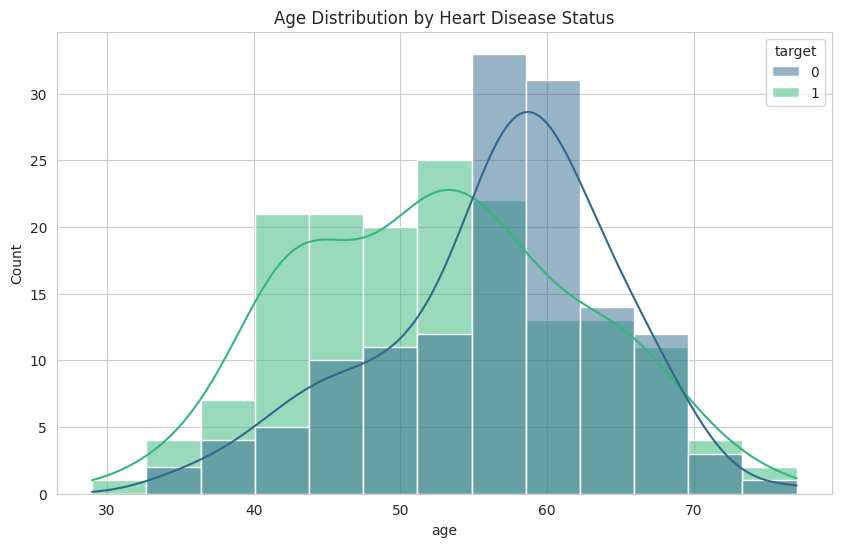

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

**Step 2.3: Feature Correlation Matrix**

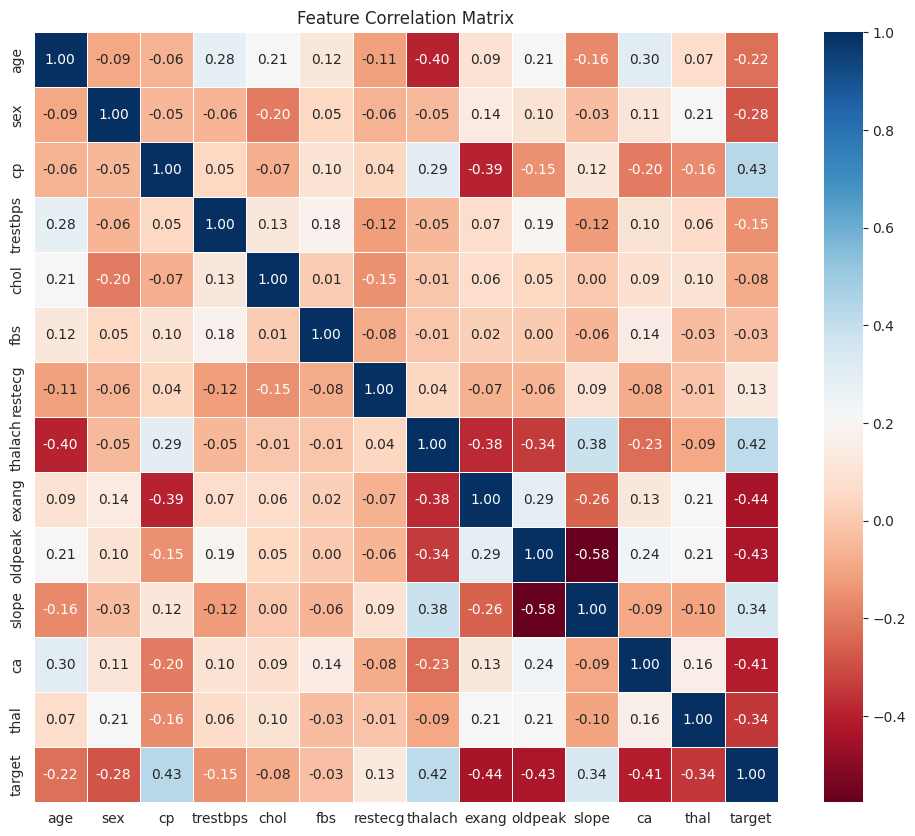

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

## Phase 3: Statistical Analysis
Analyzing descriptive statistics and group differences.

**Step 3.1: Compare Means (Healthy vs. Disease)**

In [22]:
print("Mean feature values grouped by Target (0 vs 1):")
display(df.groupby('target').mean())

Mean feature values grouped by Target (0 vs 1):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


**Step 3.2: Analysis of Chest Pain Type**

Chest Pain Type vs Heart Disease Frequency:


target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


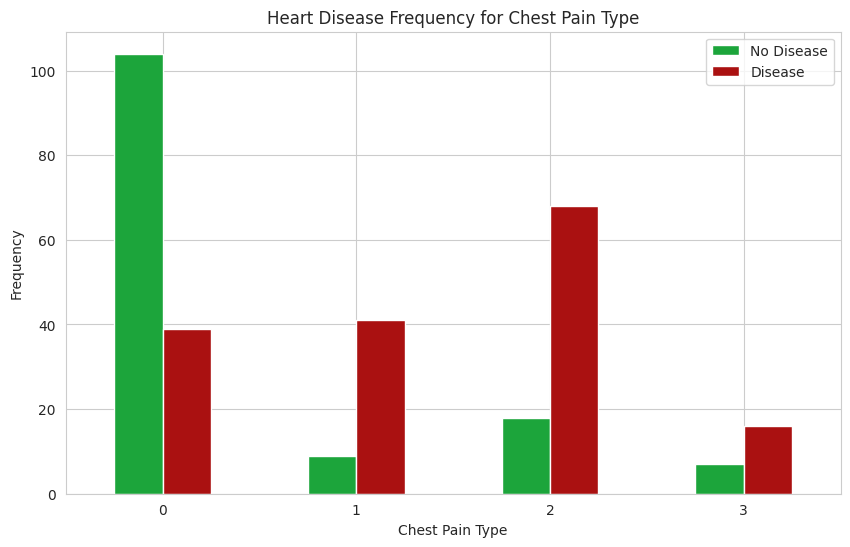

In [23]:
print("Chest Pain Type vs Heart Disease Frequency:")
cp_stat = pd.crosstab(df['cp'], df['target'])
display(cp_stat)

# Visualizing the Crosstab
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

## Phase 4: Modeling (Voting Classifier)
Building and evaluating the ensemble model.

**Step 4.1: Split Data into Training and Testing Sets**

In [24]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (241, 13)
Testing Shape: (61, 13)


**Step 4.2: Feature Scaling**

In [25]:
# Scaling is crucial for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data Scaled.")

Data Scaled.


**Step 4.3: Define and Initialize Models**

In [26]:
# Define Individual Models
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)

# Create Voting Classifier (Soft Voting)
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)],
    voting='soft'
)
print("Models Initialized.")

Models Initialized.


**Step 4.4: Train the Voting Classifier**

In [27]:
print("Training Voting Classifier...")
eclf.fit(X_train_scaled, y_train)
print("Training Complete.")

Training Voting Classifier...
Training Complete.


**Step 4.5: Predictions and Accuracy Score**

In [28]:
y_pred = eclf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {acc*100:.2f}%")

Voting Classifier Accuracy: 81.97%


**Step 4.6: Detailed Evaluation (Classification Report & Confusion Matrix)**

Classification :
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



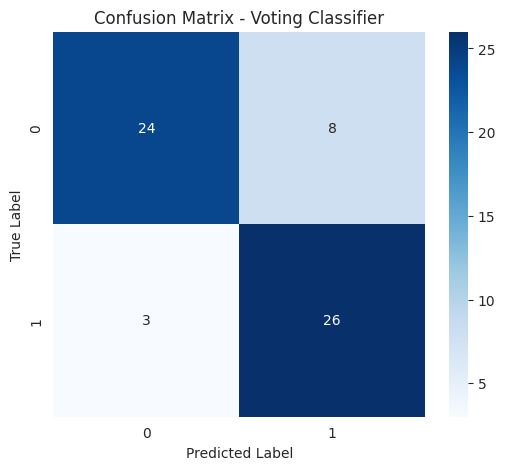

In [29]:
print("Classification :")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Conclusion
The Voting Classifier successfully combined the strengths of Logistic Regression, Random Forest, and Gradient Boosting. The confusion matrix indicates how well the model distinguishes between patients with and without heart disease.